In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

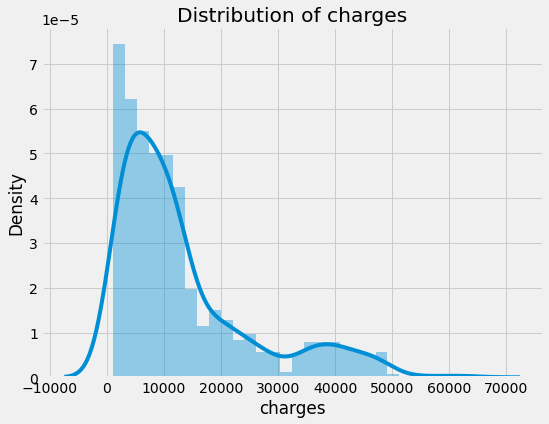

In [5]:
plt.figure(figsize=(8,6))
sns.distplot(df['charges'], kde = True)
plt.title('Distribution of charges')
plt.show()

In [6]:
px.scatter(x = 'age', y='charges', data_frame = df, color = 'age')

In [7]:
age_18_25 = df.age[(df.age >= 18)& (df.age <=25)]
age_26_35 = df.age[(df.age >= 26)& (df.age <=35)]
age_36_45 = df.age[(df.age >= 36)& (df.age <=45)]
age_46_55 = df.age[(df.age >= 46)& (df.age <=55)]
age_55 = df.age[df.age >= 55]

In [8]:
x = ['18-25', '25-36', '36-45', '45-55', '55+']
y = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
    len(age_55.values)]
px.bar(data_frame = df, x = x, y = y, color = x, title='Number of patient per age group')

In [9]:
px.histogram(data_frame = df, x = 'charges', color='sex', marginal='box')

In [10]:
px.box(x = 'sex', y = 'charges', data_frame = df)

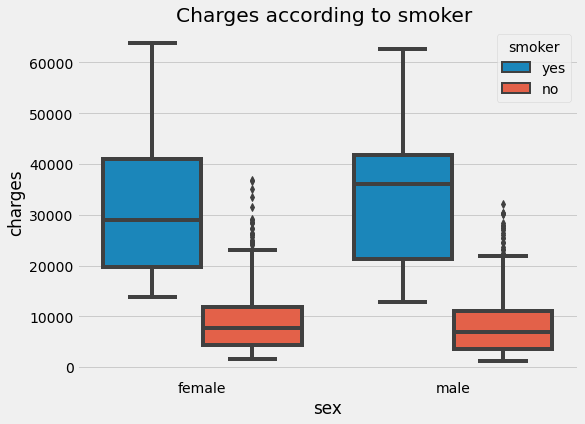

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'sex', y='charges', hue = 'smoker', data = df)
plt.title('Charges according to smoker ')
plt.show()

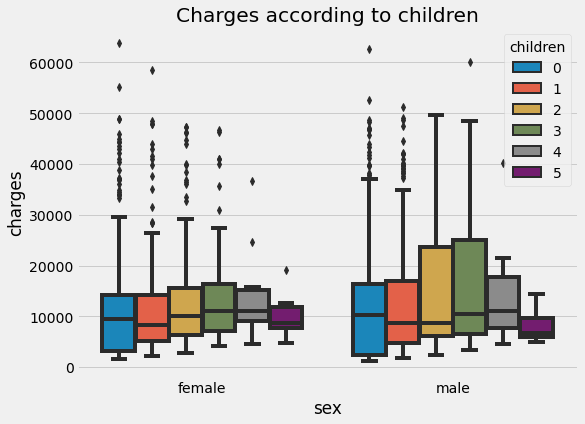

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'sex', y='charges', hue = 'children', data = df)
plt.title('Charges according to children')
plt.show()

<Figure size 576x432 with 0 Axes>

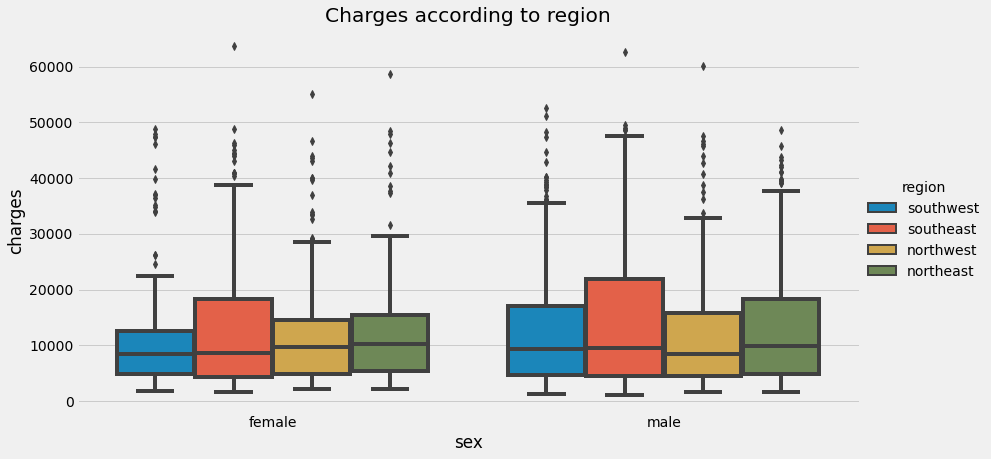

In [13]:
plt.figure(figsize=(8,6))
sns.catplot(x = 'sex', y='charges', hue = 'region', data = df,kind = 'box', height = 6, 
            aspect = 2)
plt.title('Charges according to region')
plt.show()

In [14]:
px.scatter(x = 'bmi', y = 'charges', color = 'bmi', data_frame = df, template = 'plotly_dark')

In [15]:
px.scatter(x = 'bmi', y = 'charges', color = 'sex', data_frame = df, template = 'ggplot2')

In [16]:
px.scatter(x = 'bmi', y = 'charges', color = 'smoker', data_frame = df ,template = 'xgridoff')

In [17]:
px.scatter(x = 'bmi', y = 'charges', color = 'children', data_frame = df, 
           template = 'gridon', size = 'children')

In [18]:
df_child = df.groupby(df['children'])['charges'].mean().reset_index()
df_child

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


In [19]:
px.bar(data_frame = df_child, x = 'children', y = 'charges', color = 'charges', 
       template = 'ygridoff')

In [20]:
px.histogram(data_frame = df, x = 'charges', color = 'children', marginal = 'box', nbins = 100)

<Figure size 576x432 with 0 Axes>

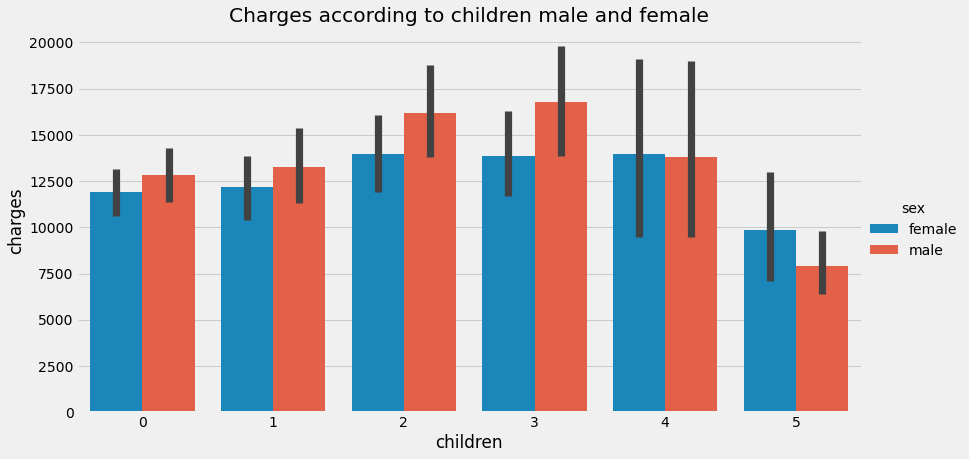

In [21]:
plt.figure(figsize=(8,6))
sns.catplot(x = 'children', y='charges', hue = 'sex', data = df,kind = 'bar', height = 6, 
            aspect = 2)
plt.title('Charges according to children male and female')
plt.show()

In [22]:
px.box(x = 'children', y = 'bmi', data_frame = df, template = 'gridon')

In [23]:
px.box(x = 'children', y = 'charges', color = 'smoker', data_frame = df, template = 'seaborn')

In [24]:
px.box(x = 'children', y = 'charges', color = 'region', data_frame = df, template = 'ggplot2')

In [25]:
px.box(x = 'smoker', y = 'charges', data_frame = df, template = 'plotly_dark')

In [26]:
px.histogram(x = 'charges', data_frame = df, nbins = 100, color = 'smoker', marginal = 'box')

In [27]:
px.box(x = 'smoker', y = 'charges', color = 'sex', data_frame = df, template = 'gridon')

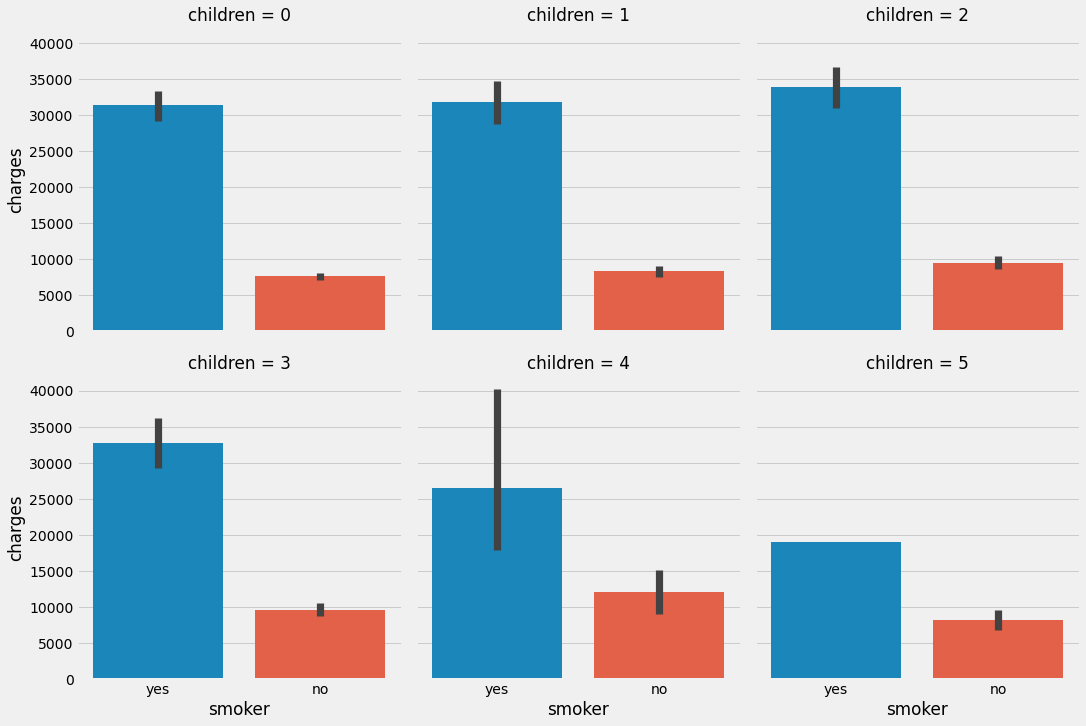

In [28]:
sns.catplot(x = 'smoker', y = 'charges', col = 'children', data = df, kind = 'bar',
           col_wrap = 3)
plt.show()

In [29]:
px.box(x = 'smoker', y = 'charges', color = 'region', data_frame = df)

In [30]:
px.histogram(data_frame = df, x = 'charges', color = 'region', nbins = 100, marginal = 'box')

In [31]:
px.box(data_frame = df, x = 'region', y = 'charges',color = 'region', template = 'seaborn')

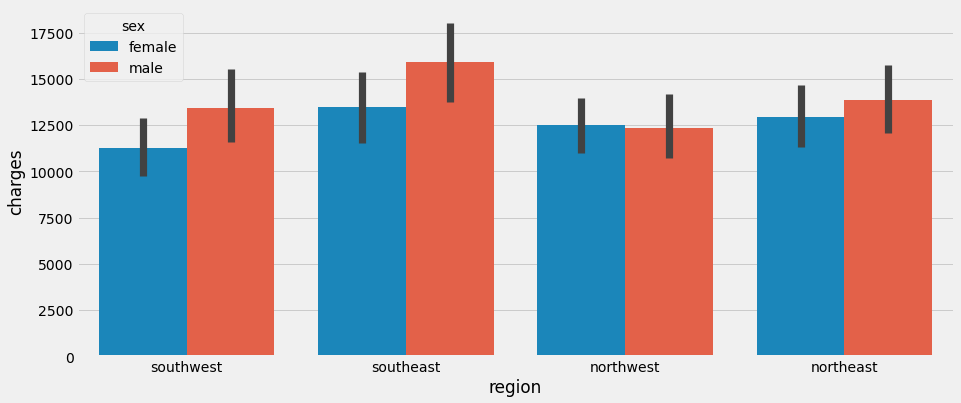

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df)
plt.show()

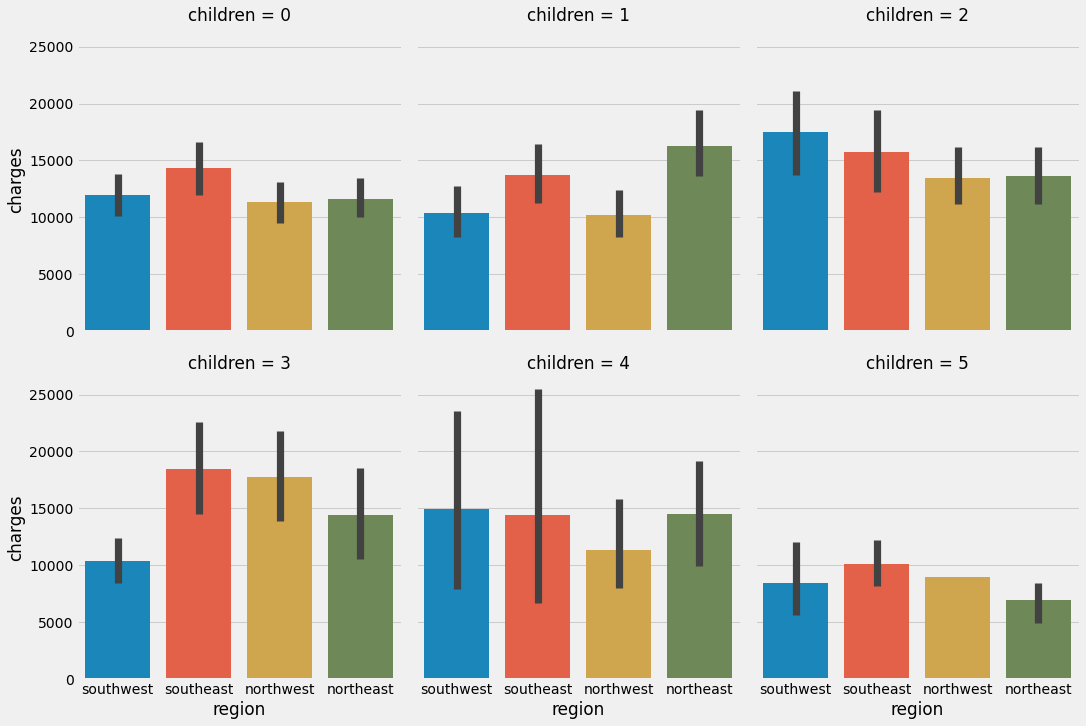

In [33]:
sns.catplot(x = 'region', y = 'charges', col = 'children', data = df, kind = 'bar', col_wrap = 3)
plt.show()

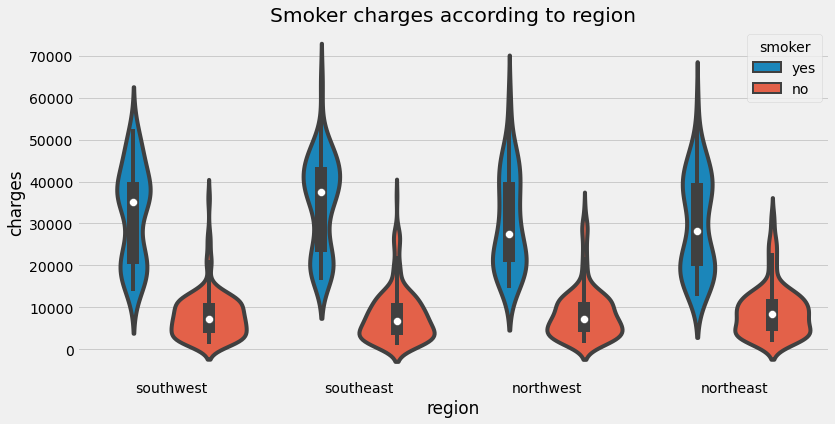

In [34]:
plt.figure(figsize = (12,6))
sns.violinplot(x = 'region', y = 'charges', hue = 'smoker', data = df)
plt.title('Smoker charges according to region')
plt.show()

<AxesSubplot:>

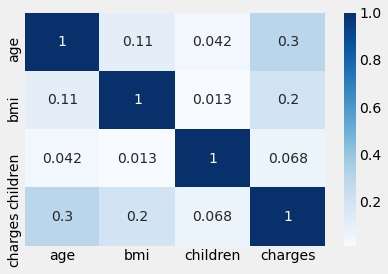

In [35]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)

# Data Preprocessing

In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer((MinMaxScaler(), ['age', 'bmi', 'children']),
                            (OneHotEncoder(handle_unknown = 'ignore'),
                            ['sex','smoker','region']))

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [39]:
import tensorflow as tf

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(200, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

In [41]:
# compiling our model

model.compile(loss = tf.keras.losses.mae, optimizer = tf.keras.optimizers.Adam(lr=0.01),
             metrics = ['mae'])

In [42]:
# fit out model
model_history = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 10317.0566 - mae: 10317.0566
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 5016.1099 - mae: 5016.1099
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 3450.8335 - mae: 3450.8335
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 3400.9873 - mae: 3400.9873
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 3604.3008 - mae: 3604.3008
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 3303.8582 - mae: 3303.8582
Epoch 7/500
34/34 [==============================] - 0s 1ms/step - loss: 3152.7947 - mae: 3152.7947
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 3003.4309 - mae: 3003.4309
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 2910.6411 - mae: 2910.6411
Epoch 10/500
34/34 [==============================] - 0s 1ms/step - loss: 2788.9407 - mae: 2788.94

34/34 [==============================] - 0s 1ms/step - loss: 1900.2921 - mae: 1900.2921
Epoch 82/500
34/34 [==============================] - 0s 1ms/step - loss: 2007.6595 - mae: 2007.6595
Epoch 83/500
34/34 [==============================] - 0s 2ms/step - loss: 1758.8831 - mae: 1758.8831
Epoch 84/500
34/34 [==============================] - 0s 1ms/step - loss: 1743.2644 - mae: 1743.2644
Epoch 85/500
34/34 [==============================] - 0s 2ms/step - loss: 1971.6567 - mae: 1971.6567
Epoch 86/500
34/34 [==============================] - 0s 1ms/step - loss: 2149.6404 - mae: 2149.6404
Epoch 87/500
34/34 [==============================] - 0s 2ms/step - loss: 1929.4794 - mae: 1929.4794
Epoch 88/500
34/34 [==============================] - 0s 1ms/step - loss: 1901.8779 - mae: 1901.8779
Epoch 89/500
34/34 [==============================] - 0s 2ms/step - loss: 1775.7623 - mae: 1775.7623
Epoch 90/500
34/34 [==============================] - 0s 1ms/step - loss: 1846.6027 - mae: 1846.6027
Epo

34/34 [==============================] - 0s 1ms/step - loss: 1617.3193 - mae: 1617.3193
Epoch 162/500
34/34 [==============================] - 0s 1ms/step - loss: 1663.8766 - mae: 1663.8766
Epoch 163/500
34/34 [==============================] - 0s 1ms/step - loss: 1695.8939 - mae: 1695.8939
Epoch 164/500
34/34 [==============================] - 0s 1ms/step - loss: 1693.8156 - mae: 1693.8156
Epoch 165/500
34/34 [==============================] - 0s 1ms/step - loss: 1619.0703 - mae: 1619.0703
Epoch 166/500
34/34 [==============================] - 0s 1ms/step - loss: 1727.6079 - mae: 1727.6079
Epoch 167/500
34/34 [==============================] - 0s 1ms/step - loss: 1722.4554 - mae: 1722.4554
Epoch 168/500
34/34 [==============================] - 0s 1ms/step - loss: 1636.7780 - mae: 1636.7780
Epoch 169/500
34/34 [==============================] - 0s 1ms/step - loss: 1659.7025 - mae: 1659.7025
Epoch 170/500
34/34 [==============================] - 0s 1ms/step - loss: 1638.1545 - mae: 1638

34/34 [==============================] - 0s 1ms/step - loss: 1587.2020 - mae: 1587.2020
Epoch 242/500
34/34 [==============================] - 0s 2ms/step - loss: 1747.5044 - mae: 1747.5044
Epoch 243/500
34/34 [==============================] - 0s 2ms/step - loss: 1699.3075 - mae: 1699.3075
Epoch 244/500
34/34 [==============================] - 0s 1ms/step - loss: 1686.7061 - mae: 1686.7061
Epoch 245/500
34/34 [==============================] - 0s 1ms/step - loss: 1587.9362 - mae: 1587.9362
Epoch 246/500
34/34 [==============================] - 0s 1ms/step - loss: 1622.2180 - mae: 1622.2180
Epoch 247/500
34/34 [==============================] - 0s 1ms/step - loss: 1535.6379 - mae: 1535.6379
Epoch 248/500
34/34 [==============================] - 0s 1ms/step - loss: 1601.8419 - mae: 1601.8419
Epoch 249/500
34/34 [==============================] - 0s 1ms/step - loss: 1593.1846 - mae: 1593.1846
Epoch 250/500
34/34 [==============================] - 0s 893us/step - loss: 1667.4484 - mae: 16

Epoch 321/500
34/34 [==============================] - 0s 1ms/step - loss: 1556.9871 - mae: 1556.9871
Epoch 322/500
34/34 [==============================] - 0s 2ms/step - loss: 1623.2185 - mae: 1623.2185
Epoch 323/500
34/34 [==============================] - 0s 1ms/step - loss: 1582.9656 - mae: 1582.9656
Epoch 324/500
34/34 [==============================] - 0s 1ms/step - loss: 1601.1689 - mae: 1601.1689
Epoch 325/500
34/34 [==============================] - 0s 1ms/step - loss: 1570.7682 - mae: 1570.7682
Epoch 326/500
34/34 [==============================] - 0s 1ms/step - loss: 1583.4995 - mae: 1583.4995
Epoch 327/500
34/34 [==============================] - 0s 1ms/step - loss: 1673.4019 - mae: 1673.4019
Epoch 328/500
34/34 [==============================] - 0s 1ms/step - loss: 1760.8607 - mae: 1760.8607
Epoch 329/500
34/34 [==============================] - 0s 1ms/step - loss: 1849.3425 - mae: 1849.3425
Epoch 330/500
34/34 [==============================] - 0s 872us/step - loss: 1601.

34/34 [==============================] - 0s 2ms/step - loss: 1499.4756 - mae: 1499.4756
Epoch 402/500
34/34 [==============================] - 0s 2ms/step - loss: 1503.9924 - mae: 1503.9924
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 1669.0389 - mae: 1669.0389
Epoch 404/500
34/34 [==============================] - 0s 2ms/step - loss: 1564.3489 - mae: 1564.3489
Epoch 405/500
34/34 [==============================] - 0s 2ms/step - loss: 1607.9788 - mae: 1607.9788
Epoch 406/500
34/34 [==============================] - 0s 1ms/step - loss: 1539.2301 - mae: 1539.2301
Epoch 407/500
34/34 [==============================] - 0s 1ms/step - loss: 1635.1962 - mae: 1635.1962
Epoch 408/500
34/34 [==============================] - 0s 2ms/step - loss: 1550.5177 - mae: 1550.5177
Epoch 409/500
34/34 [==============================] - 0s 2ms/step - loss: 1660.6862 - mae: 1660.6862
Epoch 410/500
34/34 [==============================] - 0s 2ms/step - loss: 1533.6726 - mae: 1533

34/34 [==============================] - 0s 1ms/step - loss: 1531.3208 - mae: 1531.3208
Epoch 482/500
34/34 [==============================] - 0s 1ms/step - loss: 1493.4683 - mae: 1493.4683
Epoch 483/500
34/34 [==============================] - 0s 989us/step - loss: 1564.3783 - mae: 1564.3783
Epoch 484/500
34/34 [==============================] - 0s 2ms/step - loss: 1523.1731 - mae: 1523.1731
Epoch 485/500
34/34 [==============================] - 0s 1ms/step - loss: 1516.7251 - mae: 1516.7251
Epoch 486/500
34/34 [==============================] - 0s 1ms/step - loss: 1506.5962 - mae: 1506.5962
Epoch 487/500
34/34 [==============================] - 0s 2ms/step - loss: 1553.2751 - mae: 1553.2751
Epoch 488/500
34/34 [==============================] - 0s 1ms/step - loss: 1522.3135 - mae: 1522.3135
Epoch 489/500
34/34 [==============================] - 0s 1ms/step - loss: 1501.7297 - mae: 1501.7297
Epoch 490/500
34/34 [==============================] - 0s 1ms/step - loss: 1464.8021 - mae: 14

In [43]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 997us/step - loss: 1725.8271 - mae: 1725.8271


[1725.8271484375, 1725.8271484375]

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 76,921
Trainable params: 76,921
Non-trainable params: 0
____________________________________________________